# 3D Gene Regulatory Network

This part shows how to perform the function of Gene Regulatory Network on 3D data (several samples).

## MSData Construction

We use drosophila data to simulate a 3D model. Download the **[example data](http://116.6.21.110:8090/share/dd965cba-7c1f-40b2-a275-0150890e005f)** first.

In [2]:
import os
from natsort import natsorted
import stereo as st
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator
import warnings
warnings.filterwarnings('ignore')

# prepara for input directory
data_dir = './Demo_3D/3D_AnnData_0.8.0'
files = []
for i in os.listdir(data_dir):
    files.append(os.path.join(data_dir, i))

# ensure data order by naming them regularly
files = natsorted(files)

# construct MSData object 
ms_data = MSData(_relationship='continuous', _var_type='intersect')

# add all samples into MSData
for sample in files:
    ms_data += st.io.read_h5ad(sample, bin_type='bins', bin_size=1)

## Spatial Alignment

In the analysis related to 3D data, we will recontruct 3D mesh in visualizing stage. It means that three-dimensional coordinates are needed, and we have to run `spatial_alignment` for better visualization. This function recalculates x-coordinate and y-coordinate, acoording to expression matrix, for that matter you could decide where to perform it, before filtering and normalization or after them.

In [3]:
ms_data.tl.spatial_alignment()

[2023-07-11 10:49:11][Stereo][15800][MainThread][12280][methods][80][INFO]: Using selected backend cpu. If you want to use gpu, set use_gpu = True.
[2023-07-11 10:49:11][Stereo][15800][MainThread][12280][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-11 10:49:11][Stereo][15800][MainThread][12280][st_pipeline][40][INFO]: filter_genes end, consume time 0.0551s.
[2023-07-11 10:49:11][Stereo][15800][MainThread][12280][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-11 10:49:11][Stereo][15800][MainThread][12280][st_pipeline][40][INFO]: filter_genes end, consume time 0.0491s.
[2023-07-11 10:49:13][Stereo][15800][MainThread][12280][methods][80][INFO]: Using selected backend cpu. If you want to use gpu, set use_gpu = True.
[2023-07-11 10:49:13][Stereo][15800][MainThread][12280][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-11 10:49:13][Stereo][15800][MainThread][12280][st_pipeline][40][INFO]: filter_genes end, consume time 0.0431s.
[2023-07-11 10:49

[2023-07-11 10:50:39][Stereo][15800][MainThread][12280][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-11 10:50:39][Stereo][15800][MainThread][12280][st_pipeline][40][INFO]: filter_genes end, consume time 0.1059s.
[2023-07-11 10:50:48][Stereo][15800][MainThread][12280][methods][80][INFO]: Using selected backend cpu. If you want to use gpu, set use_gpu = True.
[2023-07-11 10:50:48][Stereo][15800][MainThread][12280][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-11 10:50:48][Stereo][15800][MainThread][12280][st_pipeline][40][INFO]: filter_genes end, consume time 0.0770s.
[2023-07-11 10:50:48][Stereo][15800][MainThread][12280][st_pipeline][37][INFO]: start to run filter_genes...
[2023-07-11 10:50:48][Stereo][15800][MainThread][12280][st_pipeline][40][INFO]: filter_genes end, consume time 0.0990s.


ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: []
var: []
relationship: continuous
var_type: intersect to 0
mss: []

After loading files into MSData, you need to perform integration. The parameter `space_between` represents the distance between each adjacent pair, which will be used for z-coordinate of each sample. If data already has z-coordinate information, it will be used firstly, or you have to set `space_between` acoording to biochemical experiment records.

<div class="alert alert-info">

**Note**

`ms_data.integrate()` is necessarily to be performed after data loading. Default method is `intersect`, which means to take the intersection of genes (var) for subsequent multi-sample analysis. After integration, `_var_type` shows the intersect gene number from 0 to 13668. Otherwise here also provide `union` method.

</div>

In [4]:
ms_data.integrate(space_between='1um')
ms_data

ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: ['batch']
var: []
relationship: continuous
var_type: intersect to 13668
mss: []

## Preprocessing

`scope` and `mode` are crucial parameters in basic multi-sample analysis and correlated funcitons.

 - `scope` , similar to list, means which samples used for analysis.
 - `mode`, like a switch, shows that analysis is performed on single sample or multi samples, `integrate` and `isolated`. It is easy to distinguish processing modes.

In [5]:
ms_data.tl.cal_qc(scope=slice_generator[:],mode='integrate')
ms_data.tl.raw_checkpoint()

[2023-07-11 10:51:17][Stereo][15800][MainThread][12280][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run cal_qc
[2023-07-11 10:51:17][Stereo][15800][MainThread][12280][st_pipeline][37][INFO]: start to run cal_qc...
[2023-07-11 10:51:17][Stereo][15800][MainThread][12280][st_pipeline][40][INFO]: cal_qc end, consume time 0.0662s.
[2023-07-11 10:51:17][Stereo][15800][MainThread][12280][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run raw_checkpoint


Show the spatial scatter figure of QC distribution. In Multi-sample analysis, serveral parameters are added here for better visual presentation.

[2023-07-11 10:51:19][Stereo][15800][MainThread][12280][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run spatial_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

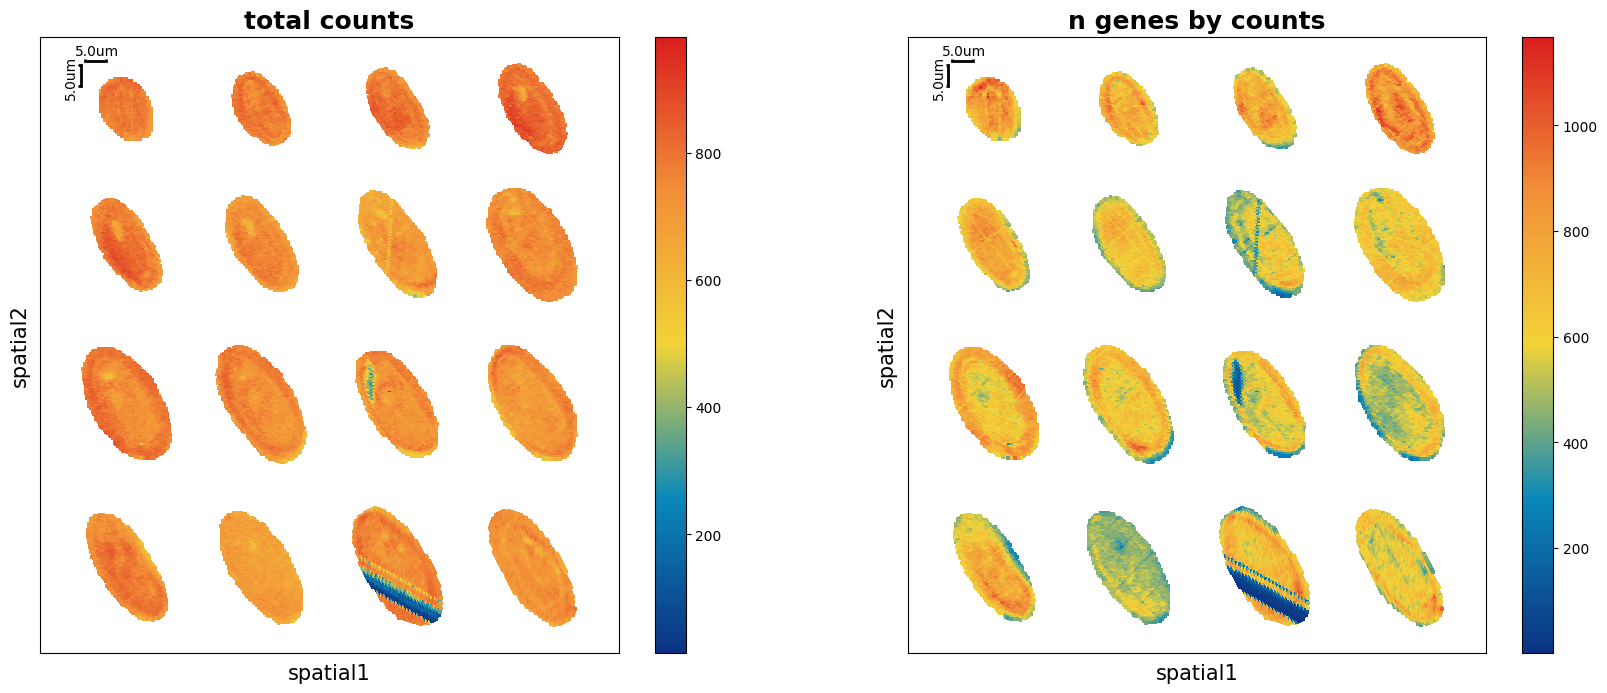

In [6]:
ms_data.plt.spatial_scatter(
            scope=slice_generator[:],
            mode='integrate',
            plotting_scale_width=10,          # the width of scale
            reorganize_coordinate=4,          # the number of plots in each row
            horizontal_offset_additional=20,  # adjustment for horizontal distance
            vertical_offset_additional=20     # adjustment for vertical distance
            )

## Clustering

<div class="alert alert-info">
    
**Note**
    
Please note that for multi samples, batch correction can be performed before clusteringif necessary.
    
</div>

In [ ]:
# normalization
ms_data.tl.normalize_total(scope=slice_generator[:],mode='integrate', target_sum=10000)
ms_data.tl.log1p(scope=slice_generator[:],mode='integrate')
ms_data.tl.scale(scope=slice_generator[:],mode='integrate', max_value=10, zero_center=True)

# embedding
ms_data.tl.pca(scope=slice_generator[:],mode='integrate', use_highly_genes=False, n_pcs=30, res_key='pca')

# batch correction
ms_data.tl.batches_integrate(scope=slice_generator[:],mode='integrate', pca_res_key='pca', res_key='pca_integrated')

# clustering
ms_data.tl.neighbors(scope=slice_generator[:],mode='integrate', pca_res_key='pca_integrated', n_pcs=30, res_key='neighbors_integrated')
ms_data.tl.leiden(scope=slice_generator[:],mode='integrate', neighbors_res_key='neighbors_integrated', res_key='leiden')

Display the visualization of clustering.

In [ ]:
ms_data.plt.cluster_scatter(            
                scope=slice_generator[:],
                mode='integrate', 
                res_key='leiden', 
                dot_size=4, 
                plotting_scale_width=10, 
                reorganize_coordinate=4, 
                horizontal_offset_additional=20, 
                vertical_offset_additional=30
                )

## Preparation of Input

Before performing the function, make sure the preparation of following input files: 


1. Transcription factor gene list: a list of transcription factors of interest. PySCENIC will use these genes to infer gene regulatory networks. Data can be downloaded through
    **[pySCENIC_TF_list](https://github.com/aertslab/pySCENIC/tree/master/resources)** and
    **[TF_lists](https://resources.aertslab.org/cistarget/tf_lists/)**.

2. Cis-regulatory annotation file for genes: an annotation file containing predicted enhancers and transcription factor binding sites for genes in their promoter regions. Data can typically be downloaded from public databases, through 
    **[cisTarget databases](https://resources.aertslab.org/cistarget/databases/)**.
    

3. Gene co-expression network file: the gene co-expression network, which includes a list of co-expressed neighbor genes and correlation coefficients for each gene. Data can be downloaded through 
    **[Motif2TF annotations](https://resources.aertslab.org/cistarget/motif2tf/)**.

<div class="alert alert-info">
    
**Note**
    
Please note that in the 3D gene regulatory network, the z coordinate information added in the calculation can only be used to calculate the TF-gene-importance results using the HOTSPOT method.
    
</div>

In [10]:
tfs_fn = './Demo_GeneRegulatoryNetwork/Drosophila/allTFs_dmel.txt'
database_fn = './Demo_GeneRegulatoryNetwork/Drosophila/dm6_v10_clust.genes_vs_motifs.rankings.feather'
motif_anno_fn = './Demo_GeneRegulatoryNetwork/Drosophila/motifs-v10nr_clust-nr.flybase-m0.001-o0.0.tbl'

# ms_data.tl.regulatory_network_inference(database_fn, motif_anno_fn, tfs_fn, save=True, num_workers=10, method='hotspot', ThreeD_slice=True, auc_threshold=0.05, prune_kwargs={'rank_threshold': 8000, 'auc_threshold': 0.05}, mode='integrate')
ms_data.tl.regulatory_network_inference(
            database_fn, 
            motif_anno_fn, 
            tfs_fn, 
            save=True, 
            num_workers=1, 
            method='hotspot', 
            ThreeD_slice=True,  
            mode='integrate'
            )

[2023-07-11 11:03:41][Stereo][15800][MainThread][12280][ms_pipeline][96][INFO]: register algorithm regulatory_network_inference to <class 'stereo.core.stereo_exp_data.StereoExpData'>-1519155786272
[2023-07-11 11:03:42][Stereo][15800][MainThread][12280][main][357][INFO]: Loading ranked database...
[2023-07-11 11:03:42][Stereo][15800][MainThread][12280][main][107][INFO]: If data belongs to 3D, it only can be runned as hotspot method now
[2023-07-11 11:03:42][Stereo][15800][MainThread][12280][main][201][INFO]: cached file not found, running hotspot now
[2023-07-11 11:03:52][Stereo][15800][MainThread][12280][main][222][INFO]: compute_autocorrelations()
100%|█████████████████████████████████████████████████████| 9043/9043 [01:03<00:00, 142.34it/s]
[2023-07-11 11:04:55][Stereo][15800][MainThread][12280][main][224][INFO]: compute_autocorrelations() done
[2023-07-11 11:04:55][Stereo][15800][MainThread][12280][main][227][INFO]: compute_local_correlations


Computing pair-wise local correlation on 4364 features...


 56%|████████████████████████▏                  | 5349726/9520066 [1:52:23<1:27:37, 793.28it/s]


<div class="alert alert-info">
    
**Note**

If `AssertionError: assert maxauc > 0` is thrown, it may be due to most of the genes are not mapped to the genome ranking databases or the majority of regulons' target genes have low weights, you can try to set `auc_threshold` to lower and/or `rank_threshold` to higher to avoid this error.

For example:

    ms_data.tl.regulatory_network_inference(database_fn, motif_anno_fn, tfs_fn, save=True, num_workers=10, method='hotspot', ThreeD_slice=True, auc_threshold=0.1, prune_kwargs={'rank_threshold': 4000, 'auc_threshold': 0.1}, mode='integrate')
    
</div>

## Observation of Results

In [15]:
ms_data

ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: ['batch', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
var: ['n_cells', 'n_counts', 'mean_umi']
relationship: other
var_type: intersect to 13668
mss: ["scope_[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:['regulatory_network_inference']"]

AUC (area under the curve) matrix represents the ratio of characteristic genes, included in regulons, to all expressed genes in each cell.

In [16]:
ms_data.mss['scope_[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]']['regulatory_network_inference']['auc_matrix']

Regulon,Abd-B(+),CG13894(+),CG14440(+),CrebA(+),Dll(+),E(spl)m3-HLH(+),E(spl)mbeta-HLH(+),E(spl)mgamma-HLH(+),GATAe(+),HGTX(+),...,lola(+),nej(+),scro(+),slbo(+),so(+),srp(+),tai(+),twi(+),vvl(+),zfh2(+)
Cell,,,,,,,,,,,,,,,,,,,,,
E14-16h_a_S01_20500x62780-0-0,0.224246,0.381003,0.306688,0.131739,0.148572,0.355503,0.894159,0.452234,0.197608,0.311172,...,0.365354,0.389575,0.230489,0.547463,0.822043,0.418920,0.636091,0.323356,0.569647,0.303033
E14-16h_a_S01_20500x62800-0-0,0.550986,0.324237,0.441654,0.130654,0.231493,0.119900,0.645392,0.449594,0.213889,0.304722,...,0.406120,0.306824,0.229575,0.540783,0.957042,0.920077,0.472020,0.322198,0.547393,0.300619
E14-16h_a_S01_20500x62820-0-0,0.602436,0.251277,0.449766,0.124919,0.189553,0.347042,0.694344,0.438394,0.211888,0.244428,...,0.370182,0.371309,0.223665,0.573433,0.960301,0.930161,0.469941,0.316050,0.544654,0.264588
E14-16h_a_S01_20500x62840-0-0,0.105012,0.197154,0.786712,0.119576,0.170644,0.345828,0.829138,0.425266,0.243162,0.392844,...,0.470872,0.421515,0.217966,0.620338,0.819073,0.401507,0.674851,0.308833,0.595418,0.328039
E14-16h_a_S01_20500x62860-0-0,0.103379,0.169477,0.586755,0.117450,0.262019,0.110071,0.881942,0.412852,0.238594,0.380929,...,0.469453,0.415084,0.216177,0.628062,0.829123,0.400201,0.647370,0.307552,0.627152,0.306258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E14-16h_a_S16_61760x79320-15-15,0.121419,0.129743,0.197017,0.139225,0.259032,0.125947,0.415828,0.467408,0.217608,0.155125,...,0.199521,0.196331,0.400638,0.370473,0.818848,0.942814,0.183218,0.331411,0.364676,0.205893
E14-16h_a_S16_61760x79340-15-15,0.121819,0.130176,0.453350,0.140343,0.152999,0.126288,0.473432,0.468672,0.288481,0.225649,...,0.274561,0.254638,0.238011,0.371854,0.812515,0.428570,0.421581,0.361119,0.440994,0.224167
E14-16h_a_S16_61760x79360-15-15,0.121395,0.211898,0.471990,0.139679,0.179920,0.126056,0.408553,0.468081,0.283723,0.230103,...,0.256258,0.216885,0.437324,0.358940,0.658314,0.428715,0.503238,0.360643,0.338773,0.217570


Index of relative importance between TFs and their target genes.

In [17]:
ms_data.mss['scope_[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]']['regulatory_network_inference']['adjacencies']

,TF,target,importance
1,CG30413,asRNA:CR45663,55.133423
2,CG2150,asRNA:CR45663,62.946981
3,Cyp4g1,asRNA:CR45663,-24.956735
4,Cpr50Cb,asRNA:CR45663,67.958739
5,CG13063,asRNA:CR45663,69.586653
...,...,...,...
19009594,CG14613,CG1090,-1.213837
19009595,Mtor,CG1090,0.398555
19009596,CG3223,CG1090,-0.559208
19009597,CG43191,CG1090,2.065851


## Visualization of Network

In [ ]:
ms_data.plt.grn_dotplot(                
                scope=slice_generator[:],
                mode='integrate', 
                cluster_res_key='leiden', 
                network_res_key='regulatory_network_inference'
                )

[2023-07-10 16:35:53][Stereo][23485][MainThread][140099682699072][ms_pipeline][103][INFO]: register plot_func auc_heatmap to <class 'stereo.core.stereo_exp_data.StereoExpData'>-140098332375360
[2023-07-10 16:35:53][Stereo][23485][MainThread][140099682699072][plot_grn][189][INFO]: Generating auc heatmap plot


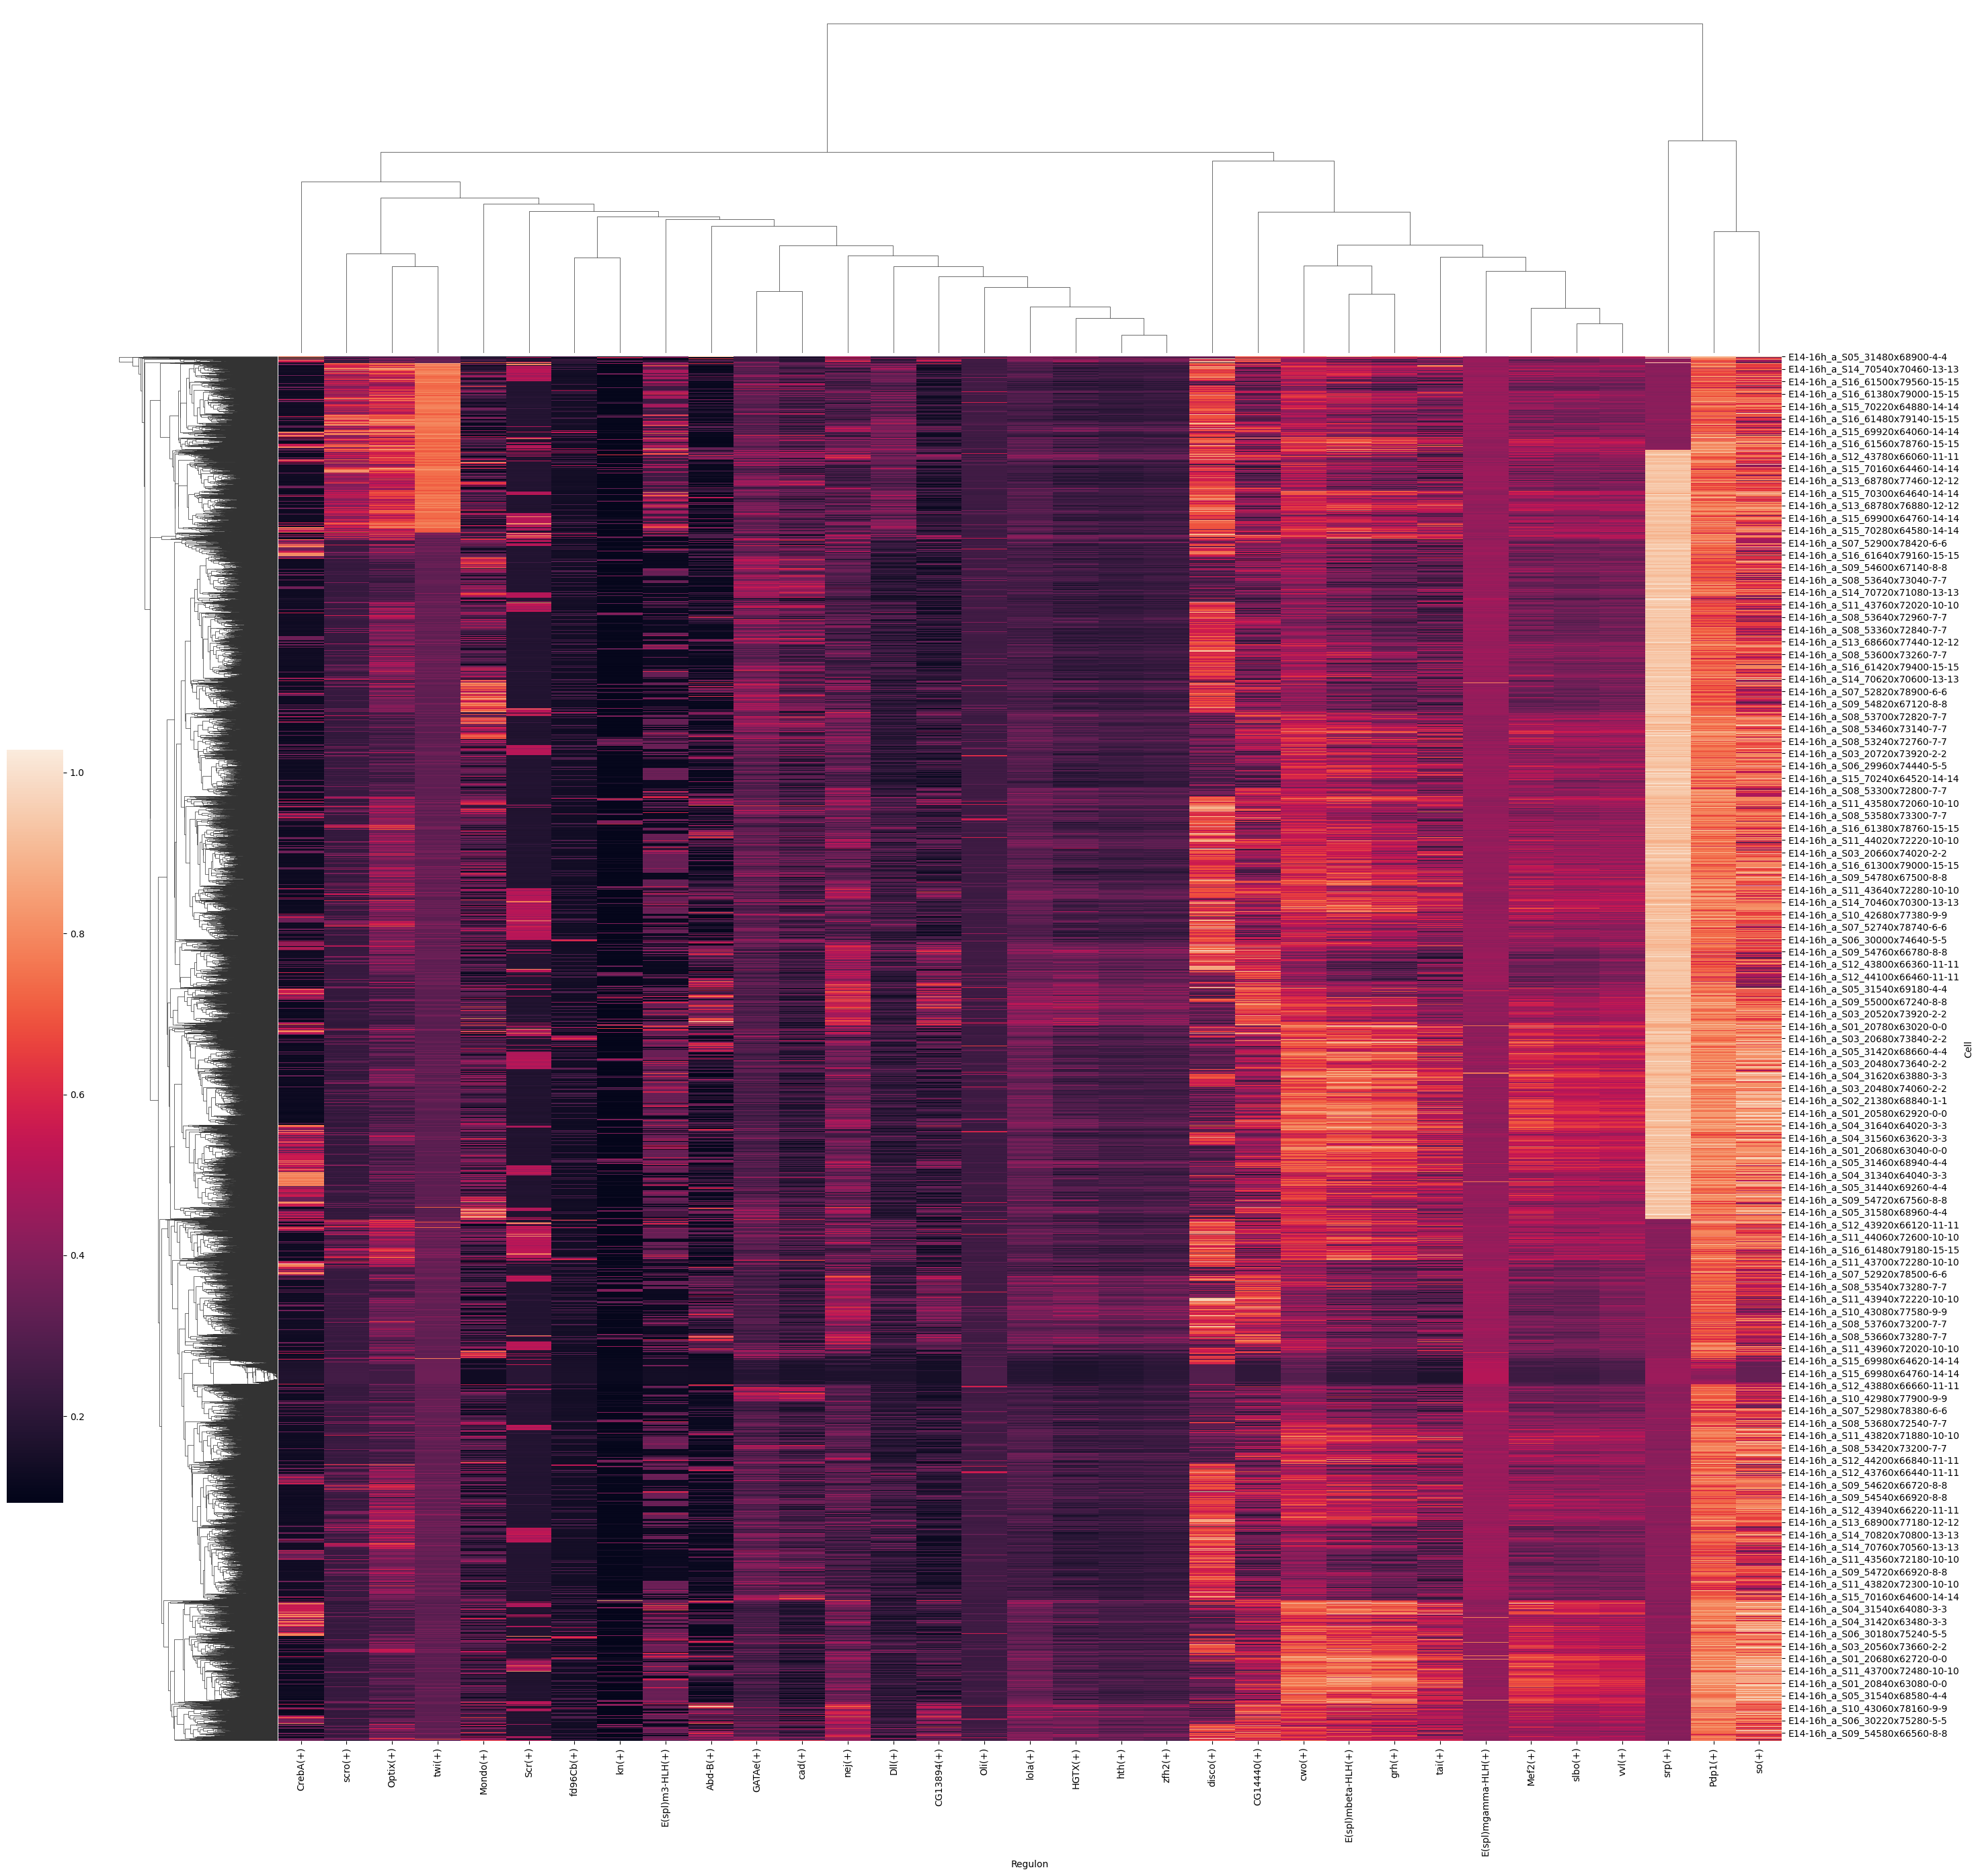

In [18]:
ms_data.plt.auc_heatmap(
                scope=slice_generator[:],
                mode='integrate',
                network_res_key='regulatory_network_inference',
                width=28,
                height=28
                )

In [ ]:
ms_data.plt.auc_heatmap_by_group(                
                scope=slice_generator[:],
                mode='integrate', 
                network_res_key='regulatory_network_inference', 
                celltype_res_key='leiden', 
                top_n_feature=5
                )

[2023-07-10 16:36:08][Stereo][23485][MainThread][140099682699072][ms_pipeline][103][INFO]: register plot_func spatial_scatter_by_regulon to <class 'stereo.core.stereo_exp_data.StereoExpData'>-140098332375360
[2023-07-10 16:36:08][Stereo][23485][MainThread][140099682699072][plot_grn][225][INFO]: Please adjust the dot_size to prevent dots from covering each other


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

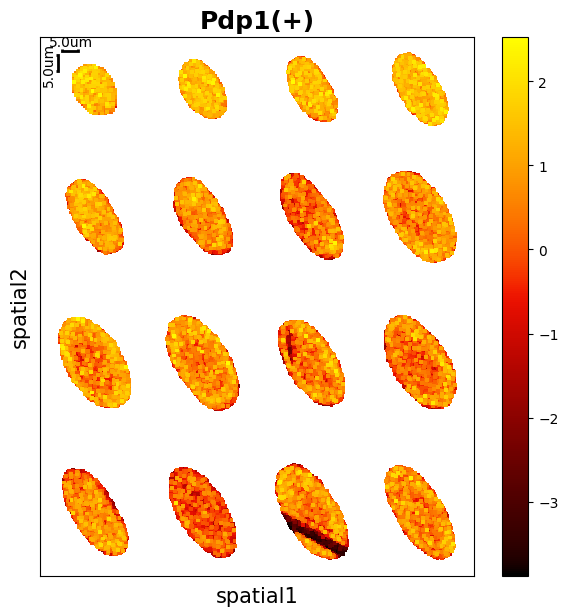

In [19]:
ms_data.plt.spatial_scatter_by_regulon(
                scope=slice_generator[:],
                mode='integrate',
                reg_name='Pdp1(+)',
                network_res_key='regulatory_network_inference',
                plotting_scale_width=10, reorganize_coordinate=4, horizontal_offset_additional=20, vertical_offset_additional=30
                )

3D spatial expression map of the regulon can also be visualized using the function `spatial_scatter_by_regulon_3D`. The observation angle can be adjusted using the `view_horizontal` and `view_vertical` parameters.

[2023-07-10 16:36:09][Stereo][23485][MainThread][140099682699072][ms_pipeline][103][INFO]: register plot_func spatial_scatter_by_regulon_3D to <class 'stereo.core.stereo_exp_data.StereoExpData'>-140098332375360


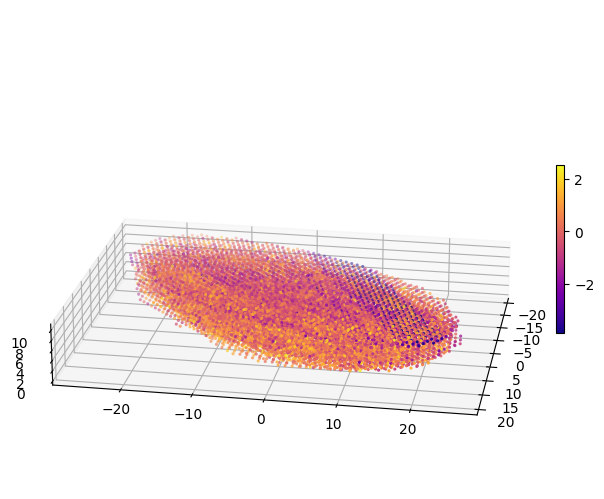

In [21]:
ms_data.plt.spatial_scatter_by_regulon_3D(
                scope=slice_generator[:],
                mode='integrate', 
                reg_name='Pdp1(+)',
                view_horizontal=10, 
                view_vertical=20,
                show_axis=True,
                network_res_key='regulatory_network_inference'
                )

<div class="alert alert-info">
    
**Note**
    
Please note that for multi samples, batch correction can be performed before clusteringif necessary.
    
</div>

In [33]:
ms_data.plt.start_vt3d_browser(
                scope=slice_generator[:],
                mode='integrate', 
                grn_res_key='regulatory_network_inference', 
                port=7777, 
                cluster_res_key='leiden'
                )

[2023-07-10 17:24:15][Stereo][23485][MainThread][140099682699072][ms_pipeline][103][INFO]: register plot_func start_vt3d_browser to <class 'stereo.core.stereo_exp_data.StereoExpData'>-140098332375360


Current front-dir is ./stereopy/stereo/plots/vt3d_browser/vt3d_browser
Starting server on http://127.0.0.1:7777
To ternimate this server , click: http://127.0.0.1:7777/endnow


10.53.11.6 - - [10/Jul/2023 17:24:25] "GET / HTTP/1.1" 200 -
10.53.11.6 - - [10/Jul/2023 17:24:25] "GET /manifest.js?771d4762c4d84c7416b9 HTTP/1.1" 200 -
10.53.11.6 - - [10/Jul/2023 17:24:25] "GET /vendor.js?68206e36d03a47277cba HTTP/1.1" 200 -
10.53.11.6 - - [10/Jul/2023 17:24:25] "GET /index.js?e502fb3b535a906ba2e0 HTTP/1.1" 200 -
10.53.11.6 - - [10/Jul/2023 17:24:26] "GET /summary.json HTTP/1.1" 200 -
10.53.11.6 - - [10/Jul/2023 17:24:26] "GET /regulon.json HTTP/1.1" 200 -


Display 3D mesh in notebook.

In [34]:
ms_data.plt.display_3d_grn(scope=slice_generator[:],mode='integrate', port=7777)

[2023-07-10 17:24:20][Stereo][23485][MainThread][140099682699072][ms_pipeline][103][INFO]: register plot_func display_3d_grn to <class 'stereo.core.stereo_exp_data.StereoExpData'>-140098332375360
